# Group 50: Neighboorhoods Similar to Thneedville

# Introduction

Love-the-life-we-lead-ville? Destined-to-succeed-ville? We-are-all-agreed-ville? You guessed it! Our overall metric for our final project is to find the neighborhood that best mirrors or reflects Thneedville from the Lorax. The inspiration behind choosing the datasets we chose were based on the story and the elements of the book/movie and lyrics of the song on the Original Soundtrack that shares the same name, Thneedville. Water quality, budgeting for capital projects, and tree benefits were assessed to analyze which neighborhood was the most similar to Thneedville from The Lorax. 

# Elevated Blood Lead Levels in Allegheny County

![green boy](https://64.media.tumblr.com/tumblr_m81i0vLKHk1rt3ezbo9_r3_500.gif)

Index(['CensusTract', 'percentEBLL2020', 'note2020', 'percentEBLL2019',
       'note2019', 'percentEBLL2018', 'note2018', 'percentEBLL2017',
       'note2017', 'percentEBLL2016', 'note2016', 'percentEBLL2015',
       'note2015', 'percentEBLL15_20', 'note15_20'],
      dtype='object')

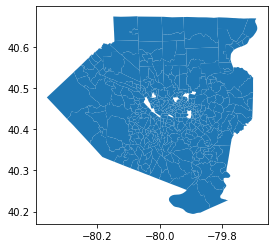

In [4]:
import pandas as pd
import numpy as np
import geopandas as gdp
%matplotlib inline
import matplotlib.pyplot as plt

blood_lead_levels = pd.read_csv("wprdc_ebll.csv")
lead_levels = gdp.read_file("EBLL_CT15_19.shp")
pd.options.display.max_columns = None

lead_levels.plot()
blood_lead_levels.columns

**Census Tract Blood Lead Level Test Results Visualized**
<br>The shp file contains geographical data, which is useful to then use geopandas to graph. This is the initial graph generated using geopandas and the shp file for the chosen dataset. The designated zones given by the geoid's in the spreadsheet. Geoids are number codes given by the Census Bureau. Some geoids may correspond to various art
located within the same neighborhood, so there may be a bit of overlap in the data.

There is a column that contains the average elevated blood lead levels from 2015 to 2020, so the columns that have notes for each years are removed to just include the data.

In [5]:
data = blood_lead_levels.drop(['note2020', 'note2019','note2018','note2017','note2016','note2015', 'note15_20'], axis = 1 )

The columns that give a note for the EBLL values for each years is removed.

In [6]:
updated_values = data.sort_values(by = 'percentEBLL15_20', ascending = False)
important_info = updated_values.head(25)
important_info

,CensusTract,percentEBLL2020,percentEBLL2019,percentEBLL2018,percentEBLL2017,percentEBLL2016,percentEBLL2015,percentEBLL15_20
363,42003561200,NaN,NaN,NaN,NaN,NaN,NaN,15.79
349,42003550900,NaN,19.23,NaN,NaN,NaN,NaN,14.77
103,42003300100,11.54,11.22,15.12,16.46,21.33,12.63,14.17
356,42003552300,NaN,NaN,8.86,7.55,7.27,NaN,12.99
42,42003120700,NaN,NaN,NaN,NaN,NaN,NaN,12.20
90,42003261400,NaN,10.91,10.71,NaN,NaN,NaN,11.82
353,42003552000,NaN,11.59,13.92,12.36,NaN,NaN,11.76
91,42003261500,NaN,NaN,NaN,NaN,NaN,NaN,11.28
361,42003561000,NaN,18.00,NaN,NaN,NaN,NaN,11.04
306,42003512800,NaN,NaN,NaN,NaN,NaN,NaN,10.84


Since the resulting data gives geoid numbers, they have to be converted to the actual name of the neighborhood, which can be looked up.

42003561200 = Wilkinsburg, PA <br>
42003550900 = McKeesport, PA <br>
42003300100 = Knocksville, PA <br>
42003552300 = McKeesport, PA <br>
42003120700 = Homewood West <br>
42003261400 = Perry South <br>
42003552000 = McKeesport <br>
42003261500 = Perrysville, PA/Ross Township <br>
42003561000 = Wilkinsburg, PA <br>
42003512800 = North Braddock <br>
42003271500 = Marshall-Shadeland(Woods Run) <br>
42003130200 = Homewood North <br>
42003270300 = Brighton Heights <br>
42003241200 = Spring Garden <br>
42003250300 = Mexican War Streets/Northside <br>
42003010300 = Bluff(Uptown) <br>
42003260700 = Perry North <br>
42003120400 = Larimer <br>
42003562500 = Esplen/Sheriden <br>
42003111400 = Garfield <br>
42003561700 = St. Clair <br>
42003180300 = Allentown <br>
42003130400 = Homewood South <br>
42003562400 = Beltzhoover/Bon Air <br>
42003508000 = Wilmerding <br>

After ordering the values from greatest to least, the neighborhoods were converted from geoid to a physical location.

In [7]:
wilkinsburg_average = (15.79 + 11.04)/2
mckeesport_average = (14.77 + 12.99 + 11.76)/3
print(wilkinsburg_average)
print(mckeesport_average)

13.415
13.173333333333332


Since Wilkinsburg and McKeesport appear multiple times in the data, the average is calculated for the final graph.

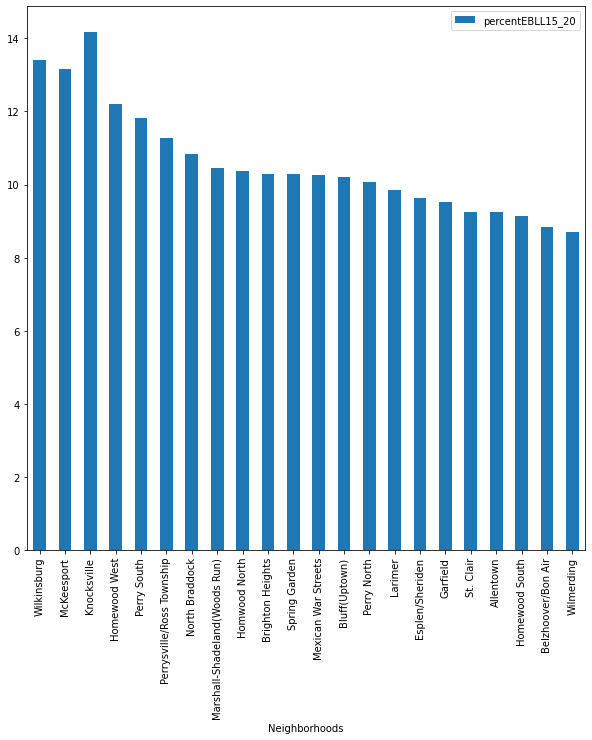

In [44]:
final_ebll = pd.DataFrame({'Neighborhoods': ['Wilkinsburg','McKeesport', 'Knocksville', 'Homewood West', 'Perry South',
                                            'Perrysville/Ross Township', 'North Braddock', 'Marshall-Shadeland(Woods Run)',
                                            'Homwood North', 'Brighton Heights', 'Spring Garden', 'Mexican War Streets',
                                             'Bluff(Uptown)', 'Perry North', 'Larimer', 'Esplen/Sheriden','Garfield','St. Clair'
                                             , 'Allentown', 'Homewood South', 'Belzhoover/Bon Air', 'Wilmerding'],
                          'percentEBLL15_20': [13.42,13.17, 14.17, 12.20, 11.82, 11.28,10.84,10.45,10.37,
                                              10.29, 10.29,10.26, 10.20,10.06,9.84, 9.62, 9.52, 9.26,
                                              9.25, 9.15, 8.85, 8.70]})
final_ebll.plot.bar(figsize = (10,10), x = 'Neighborhoods', y = 'percentEBLL15_20')

A new data frame containing the average elevated blood lead levels is created.

**Analysis and Summary of Data**
<br> Overall, the neighborhoods in Pittsburgh and surrounding area that have the highest blood lead levels are either in lower income areas or are in North Side Pittsburgh. Multiple Census Tract numbers that are traceable to Wilkinsburg and McKeesport have a larger recorded percentage of blood lead levels. However, the neighborhood that has the overall highest blood lead level in Knocksville, which has a average percentage of blood lead levels from 2015 to 2020. Although the water quality isn't quite the same as Thneedville, an increased concentration in lead in water can vause adverse effects, especially in children.

# Capital Projects

In [9]:
import pandas as pd
import geopandas

The town in the Lorax, Thneedville, was set up entirely as a result of capital greed. To find the neighborhood that best matches Thneedville, I will look at the captial projects throughout Pittsburgh, and find the best. 

In [10]:
capital = pd.read_csv("capitalprojects.csv", sep = ',', index_col = 'id')

capital.sample(5)


,name,task_description,area,budgeted_amount,status,asset_id,asset_type,fiscal_year,start_date,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
id,,,,,,,,,,,,,,,,,,,,
1875168517,PARK RECONSTRUCTION,Sidewalk Repair - Marmaduke,Facility Improvement,10000.00,Planned,Marmaduke Park,Sidewalk,2017,2017-02-08,f,Brighton Heights,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,40.484694,-80.042341
895728378,PARK RECONSTRUCTION,RIVERVIEW PARK - ENTRANCE RENOVATIONS,Facility Improvement,37500.00,Planned,Riverview Park,Park,2020,2020-09-24,NaN,Perry North,1.0,26.0,4.200398e+10,1.0,26.0,1.0,1-15,40.483776,-80.019576
759573196,7500 - FACILITY IMPROVEMENTS,NaN,Facility Improvement,24414.57,Completed,Arsenal Park Building,Facility,2017,2017-04-17,f,Lower Lawrenceville,7.0,6.0,4.200306e+10,2.0,6.0,2.0,3-3,40.466761,-79.960325
474449102,PARK RECONSTRUCTION,HIGHLAND PARK - PEDESTRIAN TUNNEL RENOVATION (...,Facility Improvement,75000.00,Planned,Highland Park,Park,2020,2020-09-24,NaN,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.477811,-79.915318
189531346,PARK RECONSTRUCTION,SOUTH SIDE PARK - PHASE I CONSTRUCTION,Facility Improvement,2472000.00,Planned,Southside Park,Park,2020,2020-09-24,NaN,South Side Slopes,3.0,17.0,4.200316e+10,3.0,17.0,3.0,4-22,40.421278,-79.978055


In [11]:
capital.groupby(['neighborhood']).mean()

,budgeted_amount,fiscal_year,council_district,ward,tract,public_works_division,pli_division,police_zone,latitude,longitude
neighborhood,,,,,,,,,,
Allegheny Center,130851.366667,2017.866667,1.0,22.0,4.200356e+10,1.0,22.0,1.0,40.452492,-80.005595
Allegheny West,973295.457143,2018.571429,1.0,22.0,4.200356e+10,1.0,22.0,1.0,40.451619,-80.010673
Allentown,160125.000000,2017.750000,3.0,18.0,4.200318e+10,5.0,18.0,3.0,40.423014,-79.994730
Arlington,250000.000000,2019.000000,3.0,16.0,4.200356e+10,3.0,16.0,3.0,40.414204,-79.980422
Banksville,743250.000000,2017.250000,2.0,20.0,4.200320e+10,5.0,20.0,6.0,40.408874,-80.035936
...,...,...,...,...,...,...,...,...,...,...
Upper Hill,357742.187500,2018.500000,6.0,5.0,4.200305e+10,3.0,5.0,2.0,40.454715,-79.959877
Upper Lawrenceville,4250.000000,2017.000000,7.0,10.0,4.200310e+10,2.0,10.0,2.0,40.481502,-79.952494
West End,138764.395000,2018.000000,2.0,20.0,4.200356e+10,5.0,20.0,6.0,40.442109,-80.032283


In [12]:
capital.describe()

,budgeted_amount,fiscal_year,council_district,ward,tract,public_works_division,pli_division,police_zone,latitude,longitude
count,9.980000e+02,1002.000000,498.000000,499.000000,5.000000e+02,499.000000,499.000000,498.000000,500.000000,500.000000
mean,4.272743e+05,2018.365269,4.530120,16.124248,4.200326e+10,3.084168,16.124248,3.389558,40.441575,-79.978559
std,1.229492e+06,1.073852,2.465067,8.031851,2.331717e+05,1.574435,8.031851,1.676219,0.024773,0.042261
min,1.000000e+03,2017.000000,1.000000,0.000000,4.200302e+10,0.000000,0.000000,1.000000,40.365740,-80.080494
25%,4.762500e+04,2017.000000,2.000000,10.000000,4.200311e+10,2.000000,10.000000,2.000000,40.426348,-80.008613
50%,1.149700e+05,2018.000000,4.000000,17.000000,4.200319e+10,3.000000,17.000000,3.000000,40.442882,-79.981840
75%,3.931322e+05,2019.000000,7.000000,22.000000,4.200330e+10,5.000000,22.000000,5.000000,40.459090,-79.944754
max,1.506580e+07,2020.000000,9.000000,32.000000,4.200398e+10,6.000000,32.000000,6.000000,40.489873,-79.870503


On average, the neighborhoods in Pittsburgh are spending around *1.94 million* dollars on each capital project. 

## Neighborhoods with Highest Budgets

To get a better sense of which neighborhoods are spending the most, we'll look at the total spending of each neighborhood, as well as the average they're spending on each project.

In [13]:
capital_projects = capital.groupby("neighborhood").sum()['budgeted_amount']
budget_capital = capital_projects.sort_values(ascending = False)

In [14]:
budget_capital.head()

neighborhood
Greenfield                   13047700.0
South Side Flats              9046026.0
Central Business District     8206845.0
Allegheny West                6813068.2
Elliott                       6675768.0
Name: budgeted_amount, dtype: float64

In [15]:
projects_neighborhood = capital.groupby("neighborhood").mean()['budgeted_amount']
projects_neighborhood.sort_values(ascending = False).head()

neighborhood
Knoxville         1.450000e+06
Swisshelm Park    1.365667e+06
Greenfield        1.003669e+06
Allegheny West    9.732955e+05
Banksville        7.432500e+05
Name: budgeted_amount, dtype: float64

Unlike the total budget of each neighborhood, *Knoxville*, tops the chart at around **1.45 million dollars** per project. Greenfield, however, has the highest total budget for captial projects.

There are a lot of NaN, so we'll drop the columns that don't mean much to our metric.

In [16]:
capital_df = capital.dropna()
capital_df.sample(5)

,name,task_description,area,budgeted_amount,status,asset_id,asset_type,fiscal_year,start_date,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
id,,,,,,,,,,,,,,,,,,,,
963264725,SPORT FACILITY IMPROVEMENTS,Court Activation Button - Herschel Park,Facility Improvement,10400.0,Completed,Herschel Park,Park,2018,2018-09-26,f,Elliott,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-17,40.439511,-80.044709
1373890833,SPORT FACILITY IMPROVEMENTS,Court Repair with ARMORÂ® Crack and Color Coat...,Facility Improvement,49500.0,In Progress,Niagara Park Basketball Court 1,Court,2019,2019-03-26,f,South Oakland,3.0,4.0,4.200304e+10,3.0,4.0,4.0,2-10,40.434633,-79.960296
1940185223,PLAY AREA IMPROVEMENTS,Herschel Playground - Replace Parts,Facility Improvement,7000.0,Completed,Herschel Playground,Playground,2018,2018-09-26,f,Elliott,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-17,40.440270,-80.043399
959571783,FACILITY IMPROVEMENTS - PUBLIC SAFETY FACILITIES,Medic 3/Police Zone 6 - Roof Replacement,Facility Improvement,200000.0,Completed,Medic 03 Police Zone 06,Facility,2018,2018-11-16,f,West End,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-17,40.442109,-80.032283
2107740644,FACILITY IMPROVEMENTS - PUBLIC SAFETY FACILITIES,Fire Station 35 - Stair Replacement,Facility Improvement,25000.0,In Progress,Firehouse 35,Facility,2019,2019-04-11,f,Brighton Heights,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,40.481736,-80.038971


In [17]:
#mask to only look at neighborhoods above threshold
project_mask = capital_df['budgeted_amount'] >= 1200000
high_budget = capital_df[project_mask]
high_budget.shape[0]

10

In [18]:
high_budget.sort_values(by = 'budgeted_amount', ascending = False).head(7)

,name,task_description,area,budgeted_amount,status,asset_id,asset_type,fiscal_year,start_date,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
id,,,,,,,,,,,,,,,,,,,,
2081497510,PARK RECONSTRUCTION,Wightman Park Improvements and Green Stormwate...,Facility Improvement,4003435.0,In Progress,Wightman Park,Park,2018,2018-04-04,f,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-18,40.443336,-79.927064
223087014,McFARREN STREET (SECOND AVENUE) BRIDGE (TIP),Bridge Construction,Engineering and Construction,3382000.0,Planned,MacFarren St Bridge,Bridge,2018,2018-03-07,f,Swisshelm Park,5.0,14.0,4.200314e+10,3.0,14.0,4.0,2-12,40.415542,-79.916199
1975162648,WEST OHIO STREET BRIDGE (TIP),Construction Phase,Engineering and Construction,2479500.0,Planned,West Ohio Street Bridge,Bridge,2017,2017-02-08,f,Allegheny West,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-7,40.451619,-80.010673
579358971,CARNAHAN ROAD WENZELL AVENUE (TIP),Construction,Engineering and Construction,2240000.0,Planned,Carnahan Road Bridge,Bridge,2017,2017-02-08,f,Banksville,2.0,20.0,4.200320e+10,5.0,20.0,6.0,4-9,40.407141,-80.034342
130752420,CHARLES ANDERSON BRIDGE (TIP),Charles Anderson Bridge - Final Design,Engineering and Construction,2000000.0,Planned,Charles Anderson Bridge,Bridge,2018,2018-02-12,f,Central Oakland,3.0,4.0,4.200304e+10,3.0,4.0,4.0,2-8,40.434414,-79.950131
336270312,EAST CARSON STREET,EAST CARSON STREET - CONSTRUCTION,Engineering and Construction,2000000.0,Planned,7490,Pavement,2019,2019-02-05,f,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,4-24,40.428797,-79.981305
1819629922,SMALLMAN STREET RECONSTRUCTION,SMALLMAN STREET - RECONSTRUCTION,Engineering and Construction,1730000.0,Planned,5012,Pavement,2019,2019-02-05,f,Strip District,7.0,2.0,4.200302e+10,6.0,2.0,2.0,2-3,40.451167,-79.985512


In [19]:
#create mask to look at individual neighborhoods
greenfield_mask = capital_df['neighborhood'] == 'Greenfield'
greenfield_df = capital_df[greenfield_mask]

greenfield_df['status'].value_counts()

Completed      5
In Progress    2
Planned        2
Canceled       1
Name: status, dtype: int64

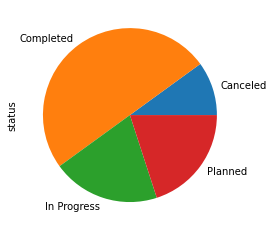

In [20]:
greenfield_df['status'].value_counts().sort_index().plot.pie()

In [21]:
south_mask = capital_df['neighborhood'] == 'South Side Flats'
south_df = capital_df[south_mask]

south_df['status'].value_counts()

Planned        10
Completed       5
In Progress     4
Name: status, dtype: int64

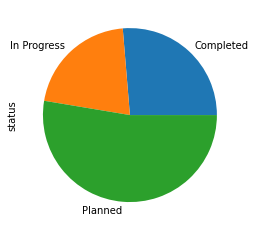

In [22]:
south_df['status'].value_counts().sort_index().plot.pie()

In [23]:
#mask to keep in progress and completed
complete_project = capital_df['status'] != 'Planned'
complete_df = capital_df[complete_project]

total_budget = complete_df.groupby('neighborhood').sum()['budgeted_amount']

In [24]:
neighborhoods = geopandas.read_file("Neighborhoods_.shp") 

In [25]:
#plot based on total budget for each neighborhood
capital_map = neighborhoods.merge(total_budget, how='left', left_on='hood', right_on='neighborhood')
capital_map.dropna()
capital_map[['hood', 'budgeted_amount', 'geometry']]

,hood,budgeted_amount,geometry
0,Central Oakland,NaN,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,NaN,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,NaN,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,23156.25,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,NaN,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
...,...,...,...
85,Ridgemont,NaN,"POLYGON ((-80.03431 40.43366, -80.03424 40.433..."
86,West End,555057.58,"POLYGON ((-80.02869 40.44454, -80.02845 40.444..."
87,California-Kirkbride,NaN,"POLYGON ((-80.02039 40.46285, -80.02022 40.462..."
88,Glen Hazel,NaN,"POLYGON ((-79.92030 40.41205, -79.92027 40.412..."


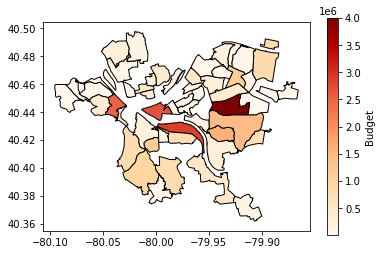

In [26]:
capital_map.plot(column = 'budgeted_amount', 
                cmap = 'OrRd',
                edgecolor = 'black',
                legend = True,
                legend_kwds = {'label': 'Budget'})

In [27]:
total_budget.sort_values(ascending = False)

neighborhood
Squirrel Hill North          4003435.00
South Side Flats             2852509.00
Central Business District    2685845.00
Elliott                      2543268.00
Greenfield                   1612700.00
Squirrel Hill South          1500500.00
Beltzhoover                  1181425.00
East Liberty                 1150200.00
Brookline                     967650.00
Lincoln-Lemington-Belmar      835777.07
Beechview                     815400.00
Carrick                       810627.00
South Side Slopes             739700.00
Swisshelm Park                715000.00
West End                      555057.58
Central Northside             537375.00
Hays                          500000.00
Lower Lawrenceville           490200.00
Spring Hill-City View         435000.00
Shadyside                     381660.00
Crafton Heights               374625.50
Fineview                      310000.00
Allegheny Center              302887.50
Bloomfield                    299711.00
Brighton Heights           

In [28]:
sum_budget = total_budget.sum()

total_budget.div(sum_budget).mul(100).sort_values(ascending = False)

neighborhood
Squirrel Hill North          13.715291
South Side Flats              9.772356
Central Business District     9.201385
Elliott                       8.712933
Greenfield                    5.524918
Squirrel Hill South           5.140534
Beltzhoover                   4.047421
East Liberty                  3.940448
Brookline                     3.315054
Lincoln-Lemington-Belmar      2.863273
Beechview                     2.793463
Carrick                       2.777112
South Side Slopes             2.534124
Swisshelm Park                2.449505
West End                      1.901561
Central Northside             1.840983
Hays                          1.712940
Lower Lawrenceville           1.679367
Spring Hill-City View         1.490258
Shadyside                     1.307522
Crafton Heights               1.283422
Fineview                      1.062023
Allegheny Center              1.037656
Bloomfield                    1.026774
Brighton Heights              0.972762
Hazelwood   

My way of normalizing the data was to make each a percentage. This allowed for us to combine our metrics into an equally weighted category. 

The highest budget for all capital projects in a neighborhood is in **Squirrel Hill North** with a budget of around **4 Million dollars**. South Side Flats and Central Business District follow with budgets of 2.8 million and 2.6 million respectively. 

Given this information, the best neighborhood in Pittsburgh is **Squirrel Hill North**. It best resembles Thneedville from the Lorax, given it's high capital budget.

# Tree Impact in Neighborhoods

This metric looks at trees managed by the city of Pittsburgh itself. Neighorhoods may have more trees than listed, but they aren't owned by the city, and therefore can be bought and cut down to build the neighborhood's capitalism. None of those trees are safe from capitalism; We're only looking at the ones that are (for now). The neighborhood with the fewest city-protected tree benefits will most resemble Thneedville.

In [29]:
import pandas as pd

trees = pd.read_csv("https://data.wprdc.org/datastore/dump/1515a93c-73e3-4425-9b35-1cd11b2196da")
hoods = pd.read_csv("https://data.wprdc.org/datastore/dump/668d7238-cfd2-492e-b397-51a6e74182ff")

trees2cols = pd.DataFrame({'airtotalval' : trees.groupby( 'neighborhood' )['air_quality_benfits_total_lbs'].agg('sum')}).reset_index()
trees2cols.head(3)

/opt/tljh/user/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,neighborhood,airtotalval
0,Allegheny Center,2205.037779
1,Allegheny West,776.044207
2,Allentown,88.759047


We are only looking at the air quality benefits in pounds per neighborhood. The above code gets rid of superfluous columns. Here's a graph of this data, where more yellow areas have more pounds of benefits:

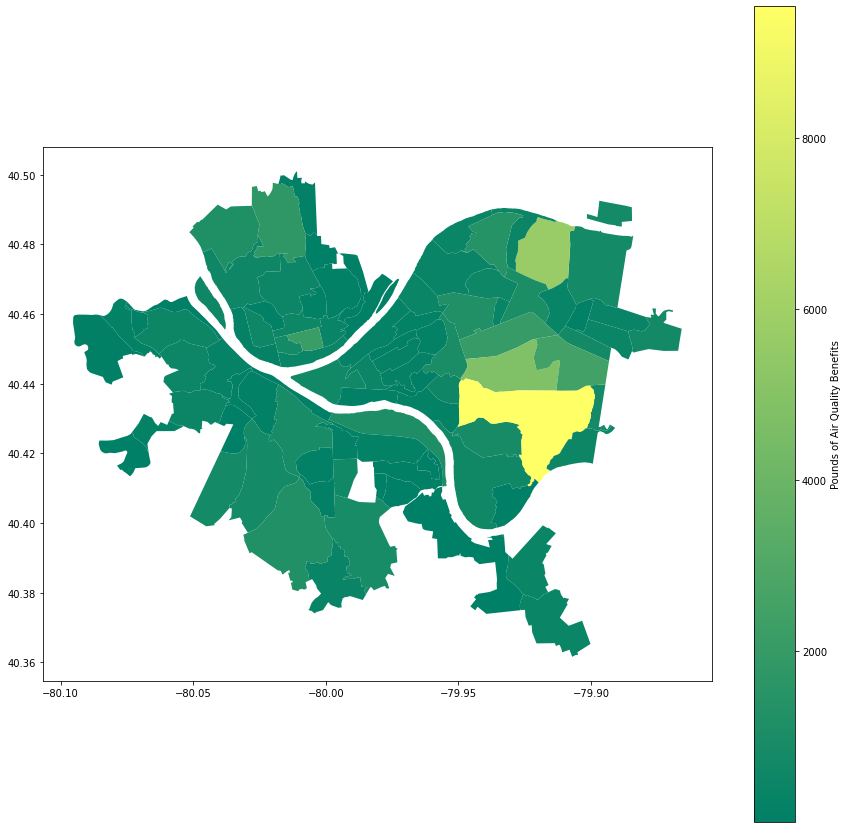

In [30]:
import geopandas

pittsburghmap = geopandas.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/dbd133a206cc4a3aa915cb28baa60fd4_0.zip")

airmap = pittsburghmap.merge(trees2cols, how = 'left', left_on = 'hood', right_on = 'neighborhood')
airmap.plot(column = "airtotalval", cmap = "summer", legend = True, figsize = (15,15), legend_kwds = {'label': "Pounds of Air Quality Benefits"})

To standardize this data, we can take the area in acres of each neighborhood and divide the neighborhood's total pounds of air quality benefits by its size to get a better representation. The following code also combines the dataframe with the neighborhood sizes with the pounds of air benefits value into a final data frame.

In [31]:
hoods2cols = pd.DataFrame( {'areaacres' : hoods.groupby('hood')['acres'].agg('sum')}).reset_index()
finalframe = pd.merge(trees2cols, hoods2cols, left_on="neighborhood", right_on="hood" ).drop("hood", axis=1)
finalframe.head(3)

,neighborhood,airtotalval,areaacres
0,Allegheny Center,2205.037779,134.703
1,Allegheny West,776.044207,90.841
2,Allentown,88.759047,189.608


The below code adds a missing value to the table and does the mentioned calculations to find the pounds of benefits per acre for each neighborhood. The data is sorted from least pounds per acre to greatest, since we're looking for neighborhoods with the LEAST amount of benefits.

In [32]:
finalframe.at[60, "areaacres"] = 775.68
finalframe["poundsperacre"] = finalframe["airtotalval"].div(finalframe["areaacres"].values)
finalframe.sort_values(by = 'poundsperacre', ascending = True).head(10)

,neighborhood,airtotalval,areaacres,poundsperacre
37,Hays,0.288710,1125.478,0.000257
35,Glen Hazel,0.636481,293.197,0.002171
70,South Shore,0.495327,136.201,0.003637
30,Esplen,2.096283,147.829,0.014180
26,East Carnegie,7.037459,277.895,0.025324
57,Northview Heights,8.435484,201.558,0.041851
77,St. Clair,20.602310,199.285,0.103381
4,Arlington Heights,8.777274,84.592,0.103760
31,Fairywood,65.663695,622.746,0.105442
66,Ridgemont,34.193366,237.059,0.144240


To come up with a final score to combine with the scores of other metrics, I used the percentile for each data point. Each neighborhood has a score between 0-100. This helped make the close-together data more distinguishable. The scores with higher values have more pounds per acre.

In [33]:
finalframe['treescore'] = 100 - (pd.qcut(finalframe['poundsperacre'], q = 10000, labels = False))/100

finalframe.sort_values(by = 'treescore', ascending = False).head(25)

,neighborhood,airtotalval,areaacres,poundsperacre,treescore
37,Hays,0.288710,1125.478,0.000257,100.00
35,Glen Hazel,0.636481,293.197,0.002171,98.88
70,South Shore,0.495327,136.201,0.003637,97.76
30,Esplen,2.096283,147.829,0.014180,96.63
26,East Carnegie,7.037459,277.895,0.025324,95.51
57,Northview Heights,8.435484,201.558,0.041851,94.39
77,St. Clair,20.602310,199.285,0.103381,93.26
4,Arlington Heights,8.777274,84.592,0.103760,92.14
31,Fairywood,65.663695,622.746,0.105442,91.02
66,Ridgemont,34.193366,237.059,0.144240,89.89


The above neighborhoods are the top twenty-five neighborhoods for the metric of least pounds of air benefits per acre in a neighborhood. Below is this information plotted on a map, where the more yellow areas have the highest calculated score:

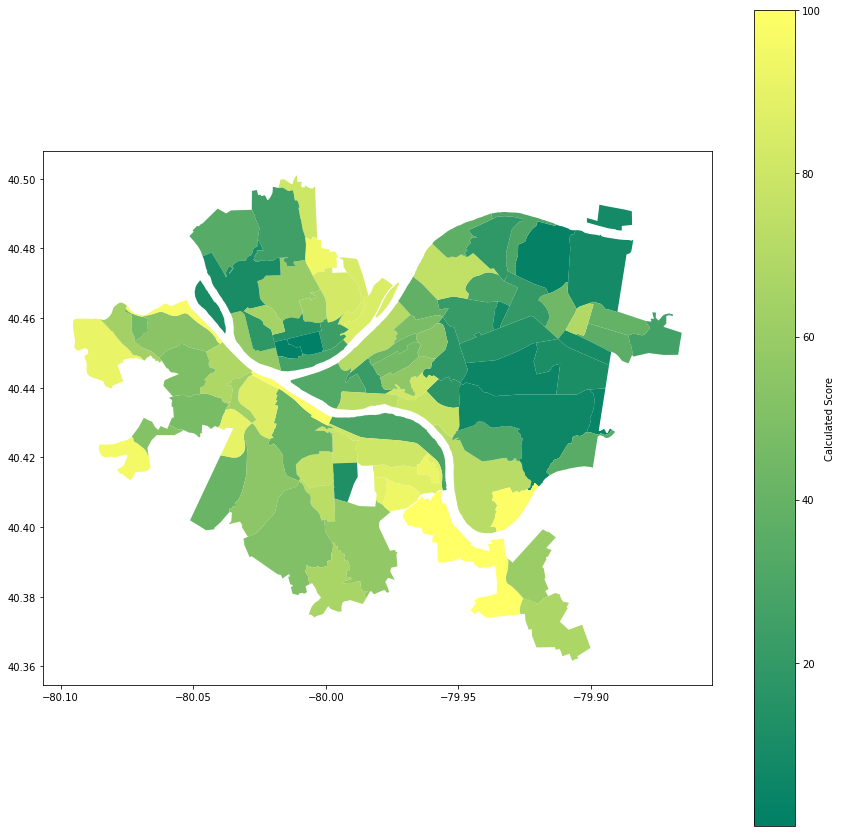

In [34]:
import geopandas
pittsburghmap = geopandas.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/dbd133a206cc4a3aa915cb28baa60fd4_0.zip")
scoremap = pittsburghmap.merge(finalframe, how = 'left', left_on = 'hood', right_on = 'neighborhood')
scoremap.plot(column = "treescore", cmap = "summer", legend = True, figsize = (15,15), legend_kwds = {'label': "Calculated Score"})

##### Conclusion
The large, dark-green areas to the east contain many of the city's parks, so they have the highest density of air quality benefits. The areas with the least air quality benefits from government owned trees are ones further from the center of the city, because these areas have plenty of privately-owned trees to be consumed by capitalism in the future. Therefore, any neighborhood in Pittsburgh that is not near the center of the city and doesn't have vast public parks most resembles Thneedville, and has the lowest density of air-improving trees that are protected by the government.

# Combined Metric

Since three different datasets were used to pinpoint and select one distinct neighborhood that best reflects Thneedville, the combined metric will be using data points from those neighborhoods in the last metric, since trees are the most important aspect of the book and the movie. The top 25 neighborhoods with the highest treescore will be used in this final metric. Since all three metrics have percentages calculated, the neighborhood with the highest percentage will be the best neighborhood. If any of our other metrics do not include a certain neighborhood in our top values, the value for that specific metric will be a zero.

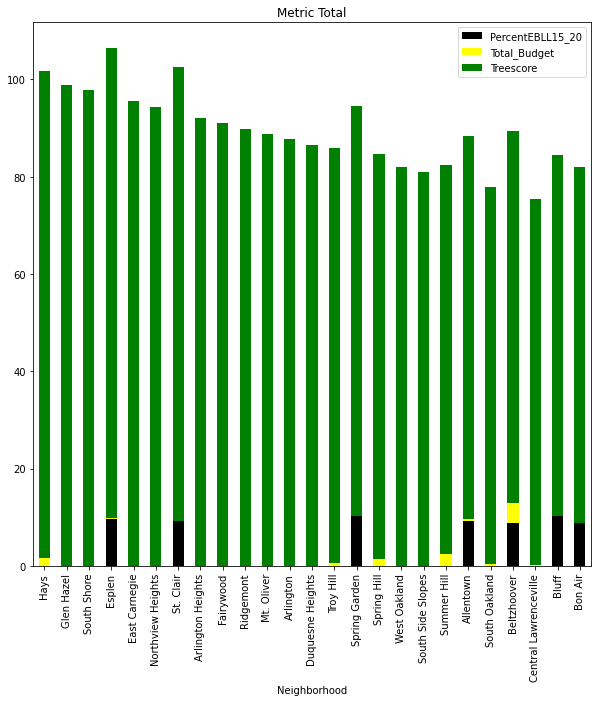

In [43]:
final_metric = pd.DataFrame({'Neighborhood': ['Hays', 'Glen Hazel', 'South Shore', 'Esplen', 'East Carnegie', 'Northview Heights'
                                             , 'St. Clair', 'Arlington Heights', 'Fairywood', 'Ridgemont', 'Mt. Oliver', 'Arlington',
                                             'Duquesne Heights', 'Troy Hill', 'Spring Garden', 'Spring Hill', 'West Oakland', 'South Side Slopes',
                                             'Summer Hill', 'Allentown','South Oakland', 'Beltzhoover', 'Central Lawrenceville', 'Bluff', 'Bon Air'],
                            'PercentEBLL15_20': [0, 0, 0, 9.62, 0, 0, 9.26, 0, 0, 0, 0, 0, 0, 0, 10.29, 0, 0, 0, 0, 9.25, 0, 8.85, 0, 10.20, 8.85],
                             'Total_Budget':[1.712940, 0, 0, 0.139776, 0, 0, 0, 0, 0.017815, 0, 0, 0, 0, 0.502166, 0, 1.490258, 0, 0,  2.534124,  0.428235,
                                             0.420099, 4.047421, 0.102776, 0, 0],
                             'Treescore': [100.00, 98.88, 97.76, 96.63, 95.51, 94.39, 93.26, 92.14, 91.02, 89.89, 88.77, 87.65, 86.52, 85.40, 84.27, 
                                          83.15, 82.03, 80.90, 79.78, 78.66, 77.53, 76.41, 75.29, 74.16, 73.04]})

final_metric.plot.bar(stacked=True, title='Metric Total', color=("black", "yellow", "green"), x = 'Neighborhood', figsize = (10,10))


According to the graph, Esplen is the best neighborhood, followed by St. Clair, Spring Garden, Beltzhoover, and Allentown.

## Conclusion/Summary

Overall, when combining all of the metrics, Esplen, according to our tests, is the most similar to Thneedville from The Lorax. All three metrics didn't consistently have the same neighborhoods, so the neighborhoods listed for the highest treescore was used because the significance of trees in The Lorax was prioritized. The most contributing factor in calculating the metric total was the treesore, since the average elevated blood lead levels and capital budgeting percentage were significantly lower. However, with those two values considered, some neighborhoods didn't have a score for either metric. Reflecting on this project, because of the metrics we measured we weren't going to have the same neighborhoods collectively, since a metric like elevated blood lead levels primarily had lower income neighborhoods, versus a metric like capital budgeting for projects, which includes affluent areas where a significant amount of money can be allocated to those projects.